In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

Dataset

In [2]:
data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\isp_cleaned.csv"
isp_df = pd.read_csv(data_path)
isp_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0,8.4,2.3,0,0
1,0,0,8.22,0,0,0.0,0.0,0,1
2,1,0,8.91,16,0,13.7,0.9,0,1
3,0,0,6.87,21,1,0.0,0.0,0,1
4,0,0,6.39,0,0,0.0,0.0,0,1


Split the data into X and Y and training and testing sets

In [3]:
X = isp_df.drop(columns=['churn'])
y = isp_df['churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier With Parameter Tuning

In [4]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 20}
DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=20)


Create the tuned DecisionTreeClassifier

In [5]:
best_dt = DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=20)

#Fit the classifier
best_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=20)

Take Metrics

In [6]:
y_pred_train = best_dt.predict(x_train)
y_pred_test = best_dt.predict(x_test)

y_prob_train = best_dt.predict_proba(x_train)
y_prob_test = best_dt.predict_proba(x_test)

In [9]:
def metric_report(actual, predicted):
    acc_train = accuracy_score(actual, predicted)
    prec_train = precision_score(actual, predicted)
    rec_train = recall_score(actual, predicted)

    print("Accuracy : {:.4f}".format(acc_train))
    print("Precision: {:.4f}".format(prec_train))
    print("Recall.  : {:.4f}".format(rec_train))


In [11]:
print(' -- train set -- ')

metric_report(y_train, y_pred_train)

print('')

print(' -- test set -- ')

metric_report(y_test, y_pred_test)

 -- train set -- 
Accuracy : 0.8475
Precision: 0.8826
Recall.  : 0.8371

 -- test set -- 
Accuracy : 0.8081
Precision: 0.8459
Recall.  : 0.8044


Confusion Matricies

In [12]:
print(' -- train set --')
print(confusion_matrix(y_train, y_pred_train))

print('')

print(' -- test set --')
print(confusion_matrix(y_test, y_pred_test))

 -- train set --
[[21967  3561]
 [ 5212 26774]]

 -- test set --
[[5133 1182]
 [1577 6487]]


ROC Curve

In [16]:
def plot_roc(fpr, tpr, roc_auc, train):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if train == True:
        plt.title('Receiver Operating Characteristic for Train Data')
    else:
        plt.title('Receiver Operating Characteristic for Test Data')
    plt.legend(loc='lower right')
    plt.show()

ROC Curve for Training Data

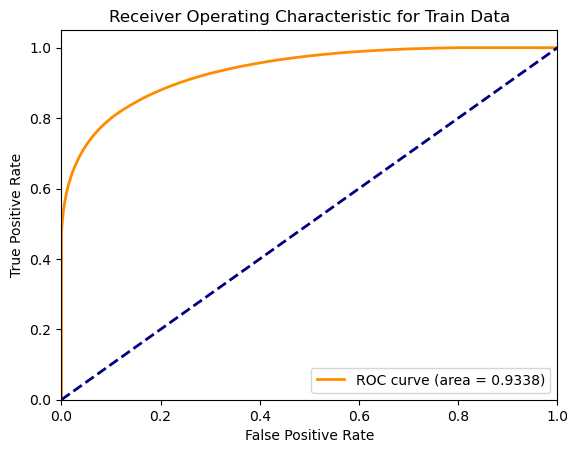

In [17]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train, y_prob_train[:,1])

plot_roc(fpr, tpr, roc_auc, True)

ROC Curve for Testing Data

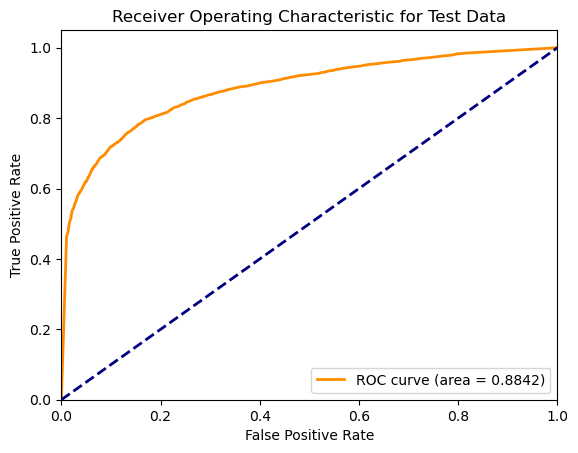

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test, y_prob_test[:,1])

plot_roc(fpr, tpr, roc_auc, False)

Feature Importances

In [ ]:
tree_imp = best_dt.feature_importances_

column_values = ['importance']

df = pd.DataFrame(data=tree_imp, columns=column_values)

df['feature'] = X.columns

df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)



   importance                      feature
5    0.394316                 download_avg
2    0.217683             subscription_age
3    0.165910                     bill_avg
1    0.102987  is_movie_package_subscriber
6    0.062656                   upload_avg
0    0.047052             is_tv_subscriber
7    0.008191          download_over_limit
4    0.001207        service_failure_count


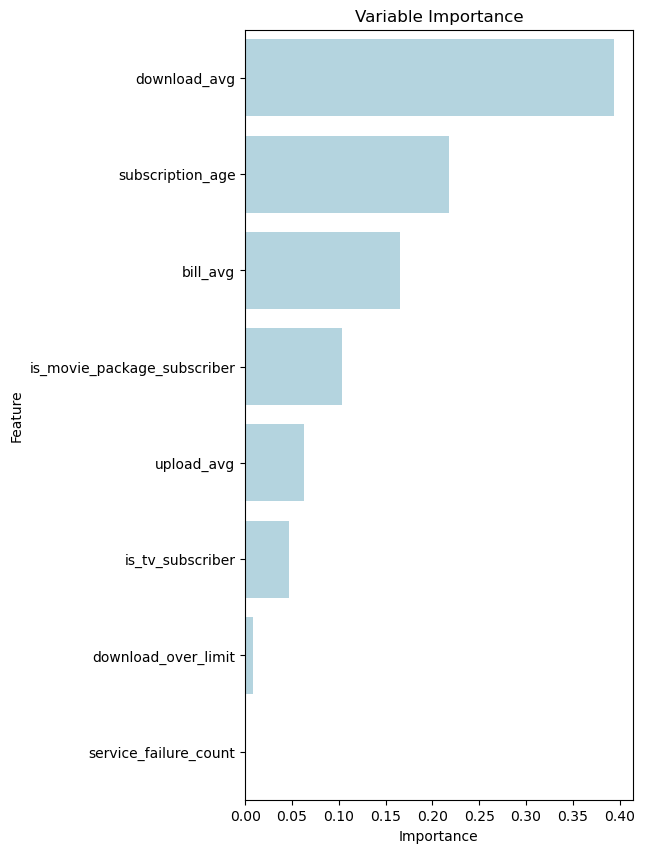

In [22]:
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

Neural Network

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models

Create the Model

In [53]:
model = models.Sequential()

Input layer with number of features

In [54]:
input_shape = (X.shape[1],)
model.add(layers.InputLayer(input_shape=input_shape))

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Hidden Layers

In [55]:
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

Output Layer

In [56]:
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Fit the model on the training set

In [59]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7169 - loss: 0.5512 - precision: 0.7592 - recall: 0.7178
Epoch 2/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7516 - loss: 0.4946 - precision: 0.8042 - recall: 0.7348
Epoch 3/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7527 - loss: 0.4905 - precision: 0.8100 - recall: 0.7254
Epoch 4/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7532 - loss: 0.4875 - precision: 0.8034 - recall: 0.7374
Epoch 5/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7575 - loss: 0.4806 - precision: 0.8133 - recall: 0.7328
Epoch 6/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7596 - loss: 0.4770 - precision: 0.8153 - recall: 0.7364
Epoch 7/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7616 - loss: 0.4765 - precision: 0.8169 - recall: 0.7337
Epoch 8/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7634 - loss: 0.4713 - precision: 0.8172 - recall: 0.7421


In [60]:
model.evaluate(x_test, y_test)

450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7689 - loss: 0.4668 - precision: 0.8237 - recall: 0.7479


[0.4679730534553528,
 0.7702900171279907,
 0.8282090425491333,
 0.7449156641960144]

In [61]:
y_pred_prob = model.predict(x_train)  
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = roc_auc_score(y_train, y_pred_prob)

1798/1798 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step


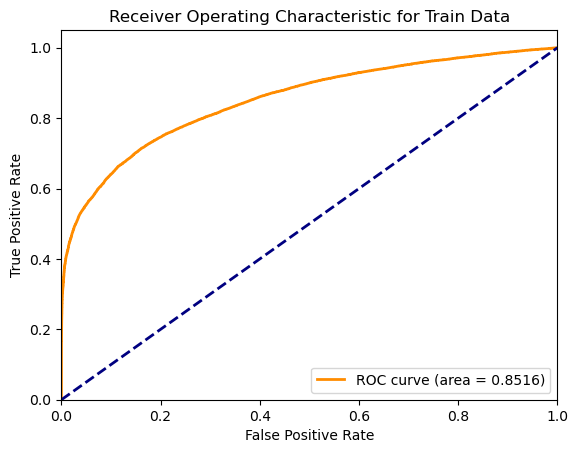

In [62]:
plot_roc(fpr, tpr, roc_auc, True)

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


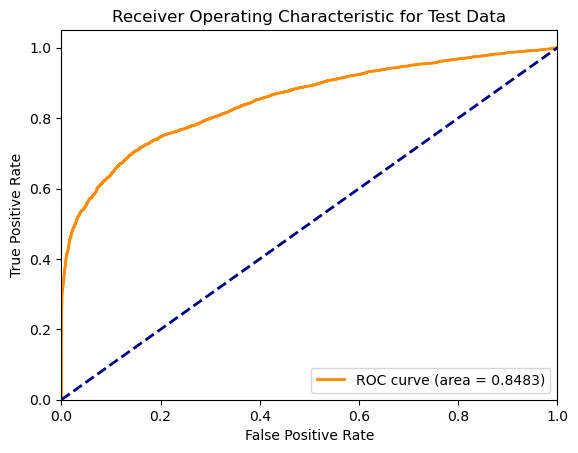

In [63]:
y_pred_prob = model.predict(x_test)  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plot_roc(fpr, tpr, roc_auc, False)